In [1]:
import numpy as np
from kmeans import AnchorKmeans
from datasets import parse_xml
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

plt.style.use('ggplot')

In [5]:
print('[INFO] Load datas')
annot_dir = "/PATH TO YOUR/VOCdevkit/VOC2012/Annotations"
boxes = parse_xml(annot_dir)
print('boxes shape : {}'.format(boxes.shape))

[INFO] Load datas
boxes shape : (40138, 2)


In [6]:
print('[INFO] Run anchor k-means with k = 2,3,...,10')
results = {}
for k in range(2, 11):
    model = AnchorKmeans(k, random_seed=333)
    model.fit(boxes)
    avg_iou = model.avg_iou()
    results[k] = {'anchors': model.anchors_, 'avg_iou': avg_iou}
    print("K = {}, Avg IOU = {:.4f}".format(k, avg_iou))

[INFO] Run anchor k-means with k = 2,3,...,10
K = 2, Avg IOU = 0.4646
K = 3, Avg IOU = 0.5391
K = 4, Avg IOU = 0.5801
K = 5, Avg IOU = 0.6016
K = 6, Avg IOU = 0.6252
K = 7, Avg IOU = 0.6434
K = 8, Avg IOU = 0.6596
K = 9, Avg IOU = 0.6732
K = 10, Avg IOU = 0.6838


[INFO] Plot average IOU curve


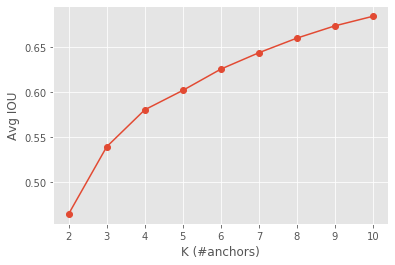

In [7]:
print('[INFO] Plot average IOU curve')
plt.figure()
plt.plot(range(2, 11), [results[k]["avg_iou"] for k in range(2, 11)], "o-")
plt.ylabel("Avg IOU")
plt.xlabel("K (#anchors)")
plt.show()

In [9]:
print('[INFO] The result anchors:')
best_k = 5
anchors = results[best_k]['anchors']
print(anchors)

[INFO] The result anchors:
[[0.7794355  0.8338808 ]
 [0.33883529 0.68815335]
 [0.61044288 0.40655773]
 [0.19493034 0.35335266]
 [0.07805765 0.13006786]]


[INFO] Visualizing anchors


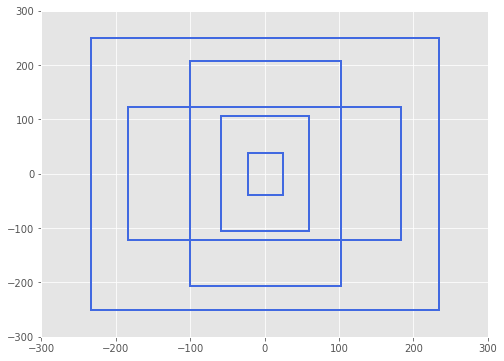

In [10]:
print('[INFO] Visualizing anchors')
w_img, h_img = 600, 600

anchors[:, 0] *= w_img
anchors[:, 1] *= h_img
anchors = np.round(anchors).astype(np.int)

rects = np.empty((5, 4), dtype=np.int)
for i in range(len(anchors)):
    w, h = anchors[i]
    x1, y1 = -(w // 2), -(h // 2)
    rects[i] = [x1, y1, w, h]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
for rect in rects:
    x1, y1, w, h = rect
    rect1 = Rectangle((x1, y1), w, h, color='royalblue', fill=False, linewidth=2)
    ax.add_patch(rect1)
plt.xlim([-(w_img // 2), w_img // 2])
plt.ylim([-(h_img // 2), h_img // 2])

plt.show()